In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score  
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [5]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


K=2 - Silhouette Score: 0.33547192894004574
K=3 - Silhouette Score: 0.357793388710272
K=4 - Silhouette Score: 0.4039582785148566
K=5 - Silhouette Score: 0.41664341513732767
K=6 - Silhouette Score: 0.4284167762892593
K=7 - Silhouette Score: 0.4111545340123845
K=8 - Silhouette Score: 0.408443059554235
K=9 - Silhouette Score: 0.4200735068174298
K=10 - Silhouette Score: 0.42261564078864017


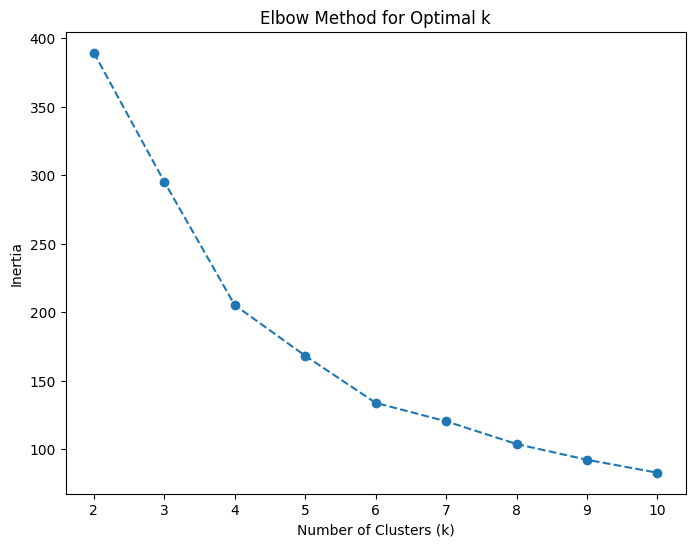

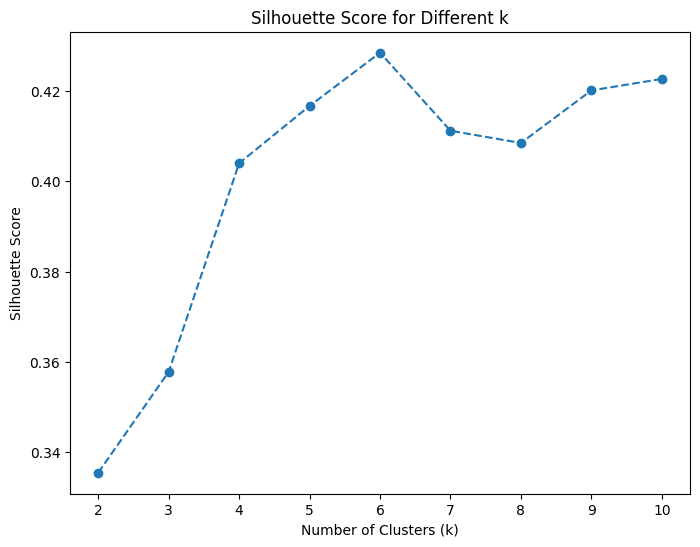


Best k based on Silhouette Score: 6


In [12]:

# Encode categorical columns
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Elbow Method and Silhouette Score to find the optimal number of clusters (k)
inertia = []
sil_scores = []

for k in range(2, 11):  # Trying k values from 2 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=500, random_state=42)
    kmeans.fit(scaled_features)
    
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_features, kmeans.labels_)
    sil_scores.append(sil_score)

    print(f"K={k} - Silhouette Score: {sil_score}")

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose k with the highest silhouette score
best_k = sil_scores.index(max(sil_scores)) + 2  # Add 2 to get the corresponding k
print(f"\nBest k based on Silhouette Score: {best_k}")

# Apply K-means with the best k
kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=500, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


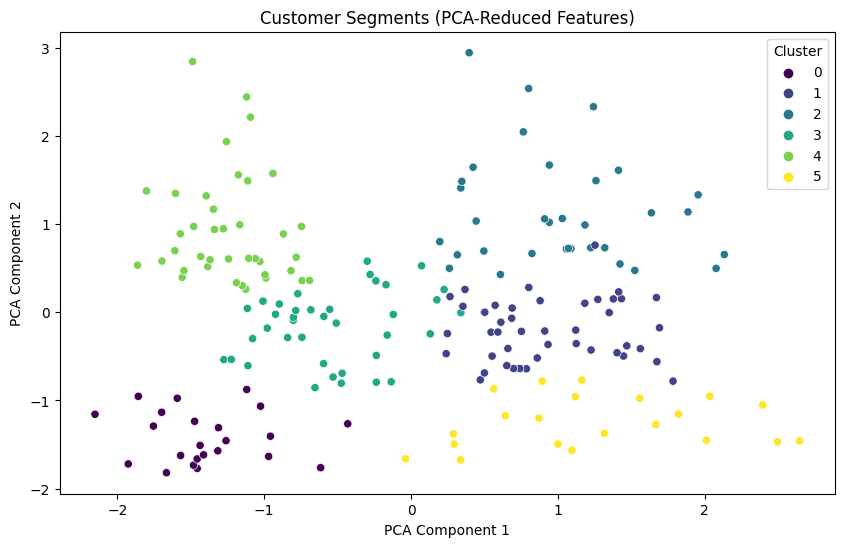

In [13]:
# Step 3: Dimensionality Reduction with PCA (for visualization)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_features = pca.fit_transform(scaled_features)

# Step 4: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    hue=data['Cluster'],
    palette='viridis',
    legend='full'
)
plt.title('Customer Segments (PCA-Reduced Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
#Cluster 0 (Purple):Customers with high spending scores but varying income levels.
#Cluster 1 (Blue):Customers with average income levels and moderate spending scores.
#Cluster 2 (Green):Customers with low income and low spending scores.
#Cluster 3 (Yellow):High-income customers with low spending scores.
#Cluster 4 (Teal):High-income customers with high spending scores.

In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4284167762892593
